In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pandas_datareader as web
from datetime import datetime

Symbols        0P0000WECS.BO  0P0000XVKT.BO  ...  0P0000XWAI.BO  0P0000XUZA.BO
Symbols                                      ...                              
0P0000WECS.BO       0.004594       0.003856  ...       0.008288       0.010773
0P0000XVKT.BO       0.003856       0.004675  ...       0.007652       0.009907
0P00005V0Q.BO       0.006412       0.006175  ...       0.012116       0.016479
0P0000XWAI.BO       0.008288       0.007652  ...       0.019077       0.022740
0P0000XUZA.BO       0.010773       0.009907  ...       0.022740       0.030766

[5 rows x 5 columns]
min variance portfolio
[0.49729288 0.36232421 0.09535409 0.03463544 0.01039338]
tangency portfolio
[0.49729288 0.36232421 0.09535409 0.03463544 0.01039338]
sharpe_ratio max
1.267625206675344
risk min
0.0713700197332897


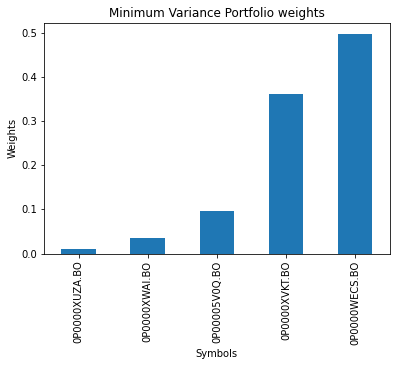

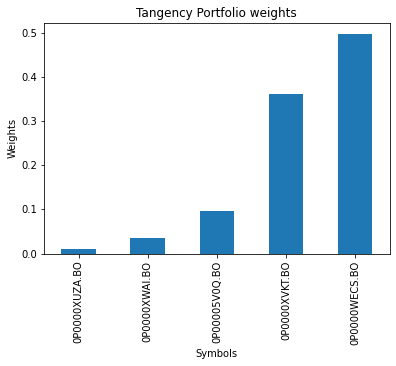

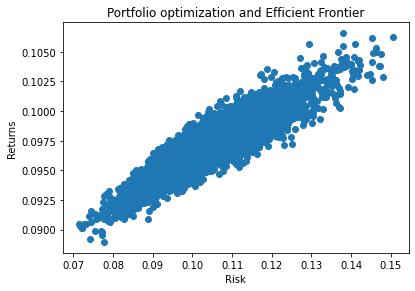

In [ ]:
tickers=[
'0P0000WECS.BO',
'0P0000XVKT.BO',
'0P00005V0Q.BO',
'0P0000XWAI.BO',
'0P0000XUZA.BO'
]
price_data=web.DataReader(tickers,start=datetime(2016,1,1),end=datetime.today(),data_source='yahoo')['Adj Close']
weight=optimization(tickers)

In [ ]:
def optimization(tickers):
    price_data=web.DataReader(tickers,start=datetime(2016,1,1),end=datetime.today(),data_source='yahoo')['Adj Close']
    #log_return 
    log_ret=np.log(price_data/price_data.shift(1))
    #covariance 
    cov_mat=log_ret.cov()*252
    print(cov_mat)
    #simulation of 5000 portfolios 
    num_port=5000
    all_wts=np.zeros((num_port,len(price_data.columns)))
    port_returns=np.zeros((num_port))
    port_risk=np.zeros((num_port))
    sharpe_ratio=np.zeros((num_port))
    for i in range(num_port):
      wts = np.random.uniform(size = len(price_data.columns))
      wts = wts/np.sum(wts)
      # saving weights in the array
      
      all_wts[i,:] = wts
      
      # Portfolio Returns
      
      port_ret = np.sum(log_ret.mean() * wts)
      port_ret = (port_ret + 1) ** 252 - 1
      # Saving Portfolio returns
      port_returns[i] = port_ret
      # Portfolio Risk
      port_sd = np.sqrt(np.dot(wts.T, np.dot(cov_mat, wts)))
      port_risk[i] = port_sd
      # Portfolio Sharpe Ratio
      # Assuming 0% Risk Free Rate
      sr = port_ret / port_sd
      sharpe_ratio[i] = sr
    print("min variance portfolio")
    names = price_data.columns
    min_var = all_wts[port_risk.argmin()]
    print(min_var)
    print("tangency portfolio")
    max_sr = all_wts[sharpe_ratio.argmax()]
    print(max_sr)
    print("sharpe_ratio max")
    print(sharpe_ratio.max())
    print("risk min")
    print(port_risk.min())
    min_var = pd.Series(min_var, index=names)
    min_var = min_var.sort_values()
    fig = plt.figure()
    ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
    ax1.set_xlabel('Asset')
    ax1.set_ylabel("Weights")
    ax1.set_title("Minimum Variance Portfolio weights")
    min_var.plot(kind = 'bar')
    plt.show();
    max_sr = pd.Series(max_sr, index=names)
    max_sr = max_sr.sort_values()
    fig = plt.figure()
    ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
    ax1.set_xlabel('Asset')
    ax1.set_ylabel("Weights")
    ax1.set_title("Tangency Portfolio weights")
    max_sr.plot(kind = 'bar')
    plt.show();
    fig = plt.figure()
    ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
    ax1.set_xlabel('Risk')
    ax1.set_ylabel("Returns")
    ax1.set_title("Portfolio optimization and Efficient Frontier")
    plt.scatter(port_risk, port_returns)
    plt.show();
    return min_var

In [ ]:
mfs=tickers

In [ ]:
df=pd.DataFrame()
for asset in mfs:
  df[asset]=web.DataReader(asset,data_source='yahoo',start=datetime(2016,1,1),end=datetime.today())['Adj Close']

In [ ]:
asset_returns_daily = df.pct_change()
asset_volatility_daily = asset_returns_daily.std()
sharpe_ratio={}
for asset in asset_returns_daily.columns:
  val=asset_returns_daily[asset].mean()/asset_returns_daily[asset].std()
  sharpe_ratio[asset]=val

In [ ]:
sharpe_ratio

{'0P0000XUYV.BO': 0.37729945252299446,
 '0P0000XUYZ.BO': 0.32070356087716173,
 '0P0000XV0J.BO': 0.16276440321448785,
 '0P0000XVK3.BO': 0.1937427936632588,
 '0P0000XVK8.BO': 0.22311428964242208,
 '0P0000XVLH.BO': 0.31817517471100554,
 '0P000123Q6.BO': 0.18889399677543842}

In [ ]:
import operator
sorted_sharpe = sorted(sharpe_ratio.items(), key=operator.itemgetter(1))

In [ ]:
sorted_sharpe

[('0P0000XV0J.BO', 0.16276440321448785),
 ('0P000123Q6.BO', 0.18889399677543842),
 ('0P0000XVK3.BO', 0.1937427936632588),
 ('0P0000XVK8.BO', 0.22311428964242208),
 ('0P0000XVLH.BO', 0.31817517471100554),
 ('0P0000XUYZ.BO', 0.32070356087716173),
 ('0P0000XUYV.BO', 0.37729945252299446)]